In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [225]:
df = pd.read_csv('complete_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 30 non-null     int64  
 1   Pylint for Stack Overflow  30 non-null     float64
 2   Radon for Stack Overflow   30 non-null     float64
 3   Flesch for Stack Overflow  30 non-null     float64
 4   Pylint for Chatgpt         30 non-null     float64
 5   Radon for Chatgpt          30 non-null     float64
 6   Flesch for Chatgpt         30 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.8 KB


In [226]:
df.head(5)

,Unnamed: 0,Pylint for Stack Overflow,Radon for Stack Overflow,Flesch for Stack Overflow,Pylint for Chatgpt,Radon for Chatgpt,Flesch for Chatgpt
0,0,4.81,3.666667,56.913333,6.0,5.0,59.688084
1,1,7.43,2.666667,59.616354,6.0,1.0,45.765912
2,2,5.00,4.000000,39.265385,7.5,4.5,57.371743
3,3,0.00,2.333333,72.670222,0.0,6.0,73.755909
4,4,0.00,1.000000,55.114109,0.0,7.0,48.730060


# Measuing cc score

In [227]:
def calculate_measured_score(cyclomatic_comflexity, upper_hinge, h_spread):
    upper_outer_fence = upper_hinge + 2 * h_spread
    if cyclomatic_comflexity <= upper_hinge:
        score = 100
    elif cyclomatic_comflexity > upper_outer_fence:
        score = 0
    else:
        score = 100 - ((cyclomatic_comflexity - upper_hinge) / (upper_outer_fence - upper_hinge)) * 100
    return score

In [228]:
def calculate_upper_hinge_and_h_spread(df, column_name):
    upper_hinge = np.percentile(df[column_name], 25)
    lower_hinge = np.percentile(df[column_name], 0)
    h_spread = upper_hinge - lower_hinge
    return upper_hinge, h_spread

## Distribution of the stackoverflow cc score

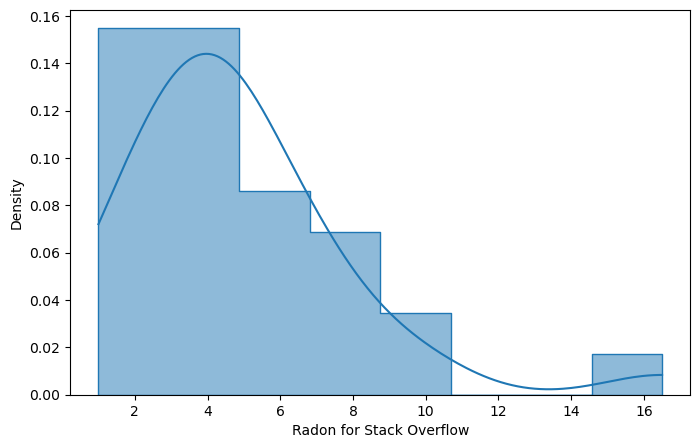

In [229]:
upper_hinge_so, h_spread_so = calculate_upper_hinge_and_h_spread(df, "Radon for Stack Overflow")
upper_hinge_so, h_spread_so

df['measured_cc_so'] = df['Radon for Stack Overflow'].apply(lambda x: calculate_measured_score(x, upper_hinge_so, h_spread_so))

plt.figure(figsize=(8, 5))
sns.histplot(df['Radon for Stack Overflow'], kde=True, stat='density', element='step')
plt.show()

## Distribution of the stackoverflow score after apflying measurement

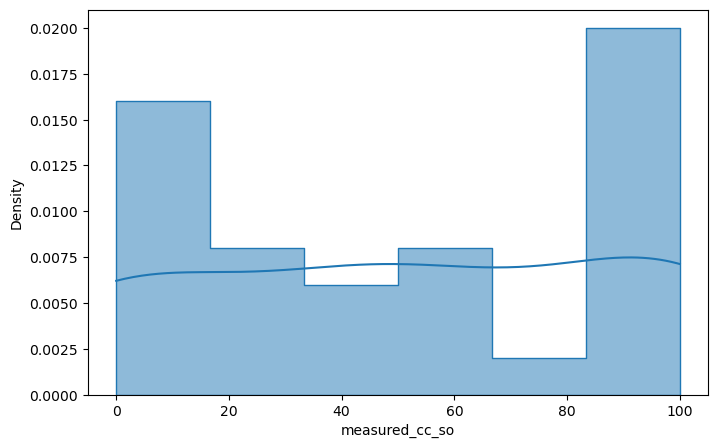

In [230]:
plt.figure(figsize=(8, 5))
sns.histplot(df['measured_cc_so'], kde=True, stat='density', element='step')
plt.show()

## ChatGPT

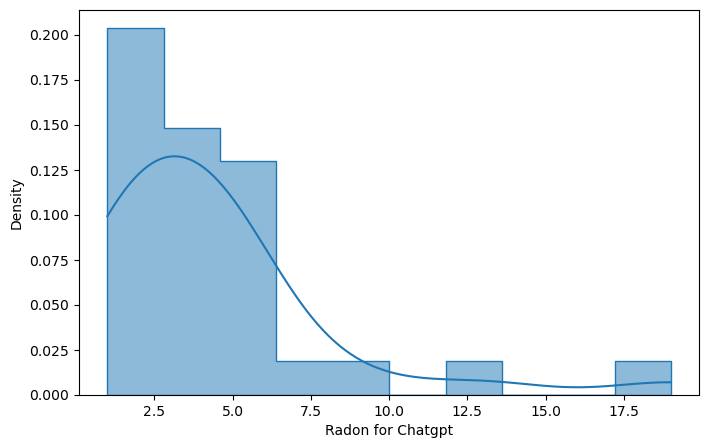

In [231]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Radon for Chatgpt'], kde=True, stat='density', element='step')
plt.show()

## ChatGPT after measurement

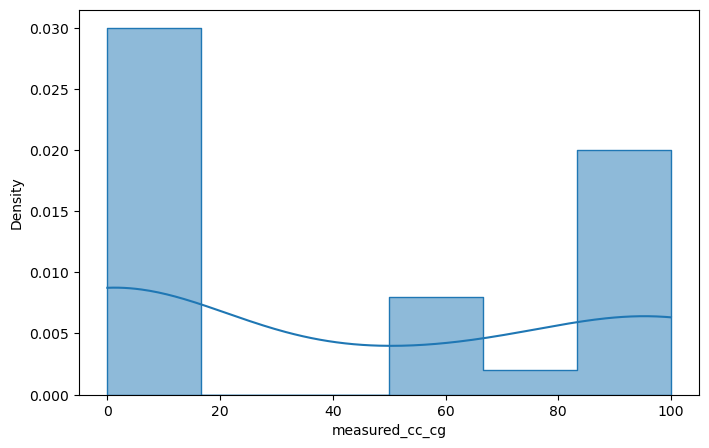

In [232]:
upper_hinge_cg, h_spread_cg = calculate_upper_hinge_and_h_spread(df, "Radon for Chatgpt")
upper_hinge_cg, h_spread_cg

df['measured_cc_cg'] = df['Radon for Chatgpt'].apply(lambda x: calculate_measured_score(x, upper_hinge_cg, h_spread_cg))

plt.figure(figsize=(8, 5))
sns.histplot(df['measured_cc_cg'], kde=True, stat='density', element='step')
plt.show()

## Failed to reject null hypothesis.

In [233]:
# run independent samfles t-test
t_stat, p_value = ttest_ind(df['measured_cc_cg'], df['measured_cc_so'], equal_var=False)

# print results
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: -0.825513190715967
p-value: 0.4125404659904216


# Measuring pylint score

In [234]:
def calculate_measured_score_up(df, column_name, upper_hinge, h_spread):
    measured_scores = []
    for value in df[column_name]:
        if value >= upper_hinge:
            score = 100
        elif value <= upper_hinge - 2 * h_spread:
            score = 0
        else:
            score = 100 * (value - (upper_hinge - 3 * h_spread)) / (3 * h_spread)
        measured_scores.append(score)
    return measured_scores

## Stackover flow pylint

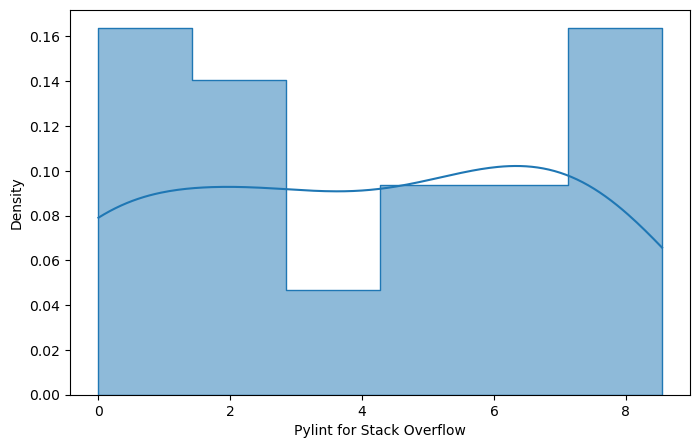

In [235]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Pylint for Stack Overflow'], kde=True, stat='density', element='step')
plt.show()

## Stackover flow pylint after measurement

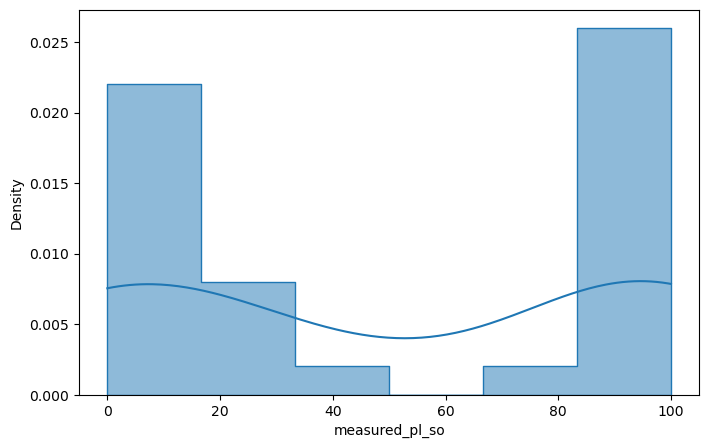

In [236]:
upper_hinge_so_pl, h_spread_so_pl = calculate_upper_hinge_and_h_spread(df, "Pylint for Stack Overflow")
upper_hinge_so_pl, h_spread_so_pl

df['measured_pl_so'] = df['Pylint for Stack Overflow'].apply(lambda x: calculate_measured_score(x, upper_hinge_so_pl, h_spread_so_pl))

plt.figure(figsize=(8, 5))
sns.histplot(df['measured_pl_so'], kde=True, stat='density', element='step')
plt.show()

## ChatGPT pylint

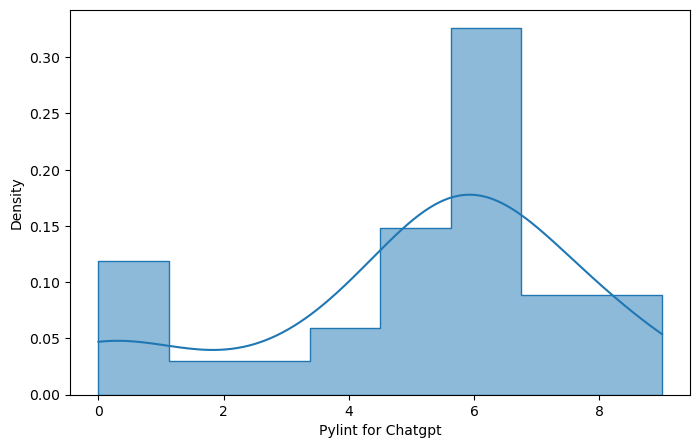

In [237]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Pylint for Chatgpt'], kde=True, stat='density', element='step')
plt.show()

## ChatGPT pylint after measurment

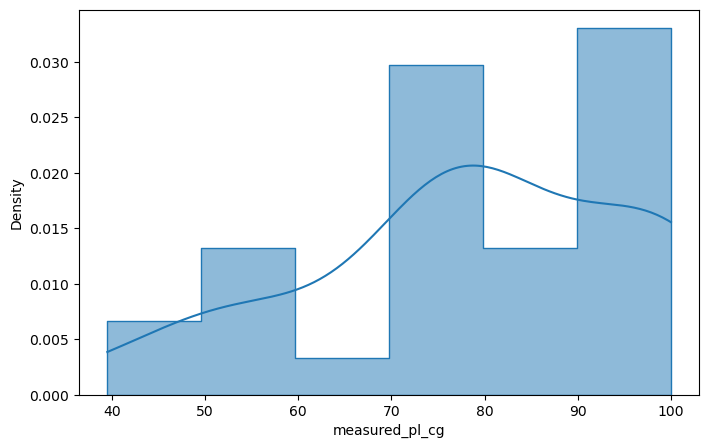

In [238]:
upper_hinge_cg_pl, h_spread_cg_pl = calculate_upper_hinge_and_h_spread(df, "Pylint for Chatgpt")
upper_hinge_cg_pl, h_spread_cg_pl

df['measured_pl_cg']= df['Pylint for Chatgpt'].apply(lambda x: calculate_measured_score(x, upper_hinge_cg_pl, h_spread_cg_pl))

plt.figure(figsize=(8, 5))
sns.histplot(df['measured_pl_cg'], kde=True, stat='density', element='step')
plt.show()

In [239]:
# run independent samfles t-test
t_stat, p_value = ttest_ind(df['measured_pl_cg'], df['measured_pl_so'], equal_var=False)

# print results
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: 3.3386651155408735
p-value: 0.001896510162206414


# Flesch

## SO before and after

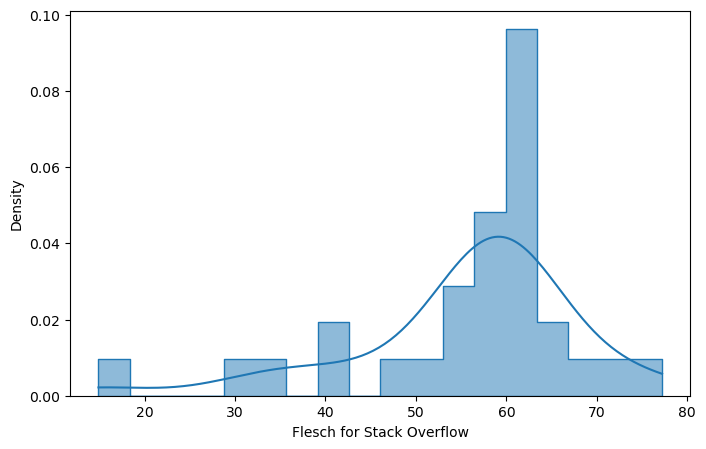

In [240]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Flesch for Stack Overflow'], kde=True, stat='density', element='step')
plt.show()

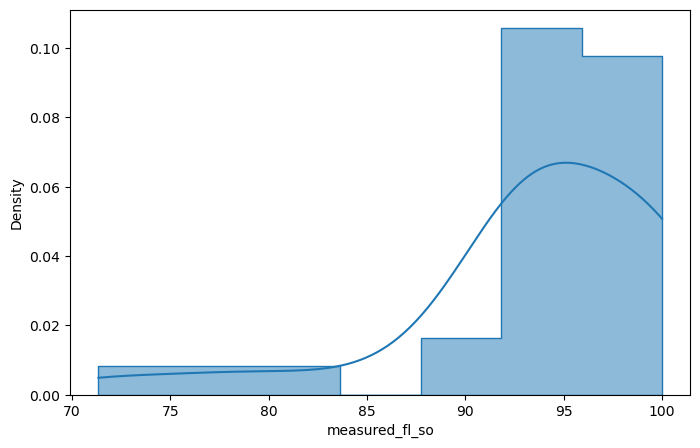

In [241]:
upper_hinge_so_fl, h_spread_so_fl = calculate_upper_hinge_and_h_spread(df, "Flesch for Stack Overflow")
upper_hinge_so_fl, h_spread_so_fl

df['measured_fl_so']= df['Flesch for Stack Overflow'].apply(lambda x: calculate_measured_score(x, upper_hinge_so_fl, h_spread_so_fl))

plt.figure(figsize=(8, 5))
sns.histplot(df['measured_fl_so'], kde=True, stat='density', element='step')
plt.show()

## Chatgpt before and after

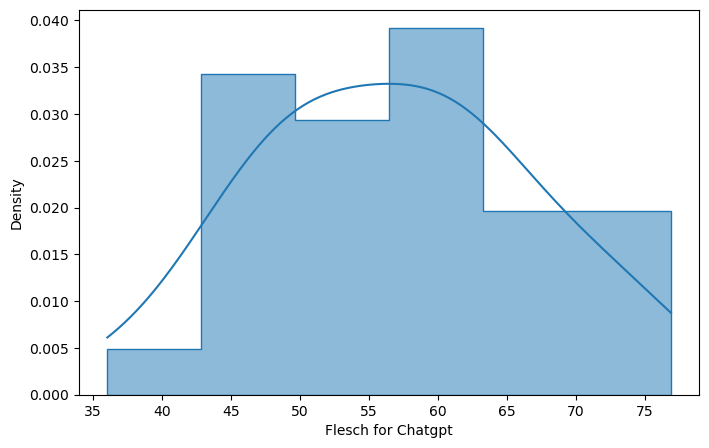

In [242]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Flesch for Chatgpt'], kde=True, stat='density', element='step')
plt.show()

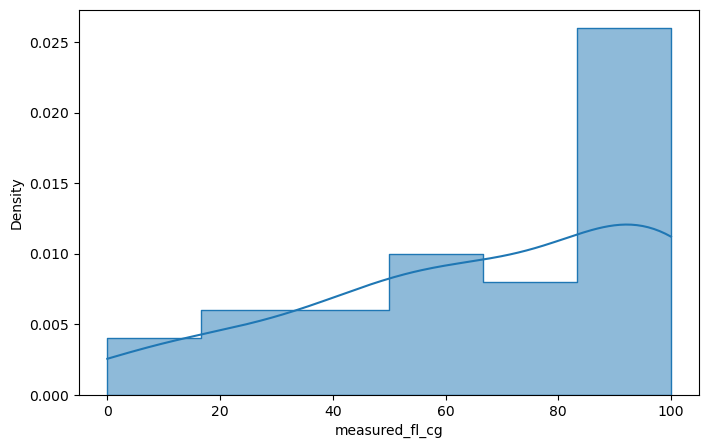

In [243]:
upper_hinge_cg_fl, h_spread_cg_fl = calculate_upper_hinge_and_h_spread(df, "Flesch for Chatgpt")
upper_hinge_cg_fl, h_spread_cg_fl

df['measured_fl_cg']= df['Flesch for Chatgpt'].apply(lambda x: calculate_measured_score(x, upper_hinge_cg_fl, h_spread_cg_fl))

plt.figure(figsize=(8, 5))
sns.histplot(df['measured_fl_cg'], kde=True, stat='density', element='step')
plt.show()

## Reject!

In [244]:
# run independent samfles t-test
t_stat, p_value = ttest_ind(df['measured_fl_cg'], df['measured_fl_so'], equal_var=False)

# print results
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: -4.458664482898674
p-value: 9.574029863653019e-05
